In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')
df.shape

(1500, 11)

In [4]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
5,27,0,3,14,4,31.706659,54,50,50,1,1
6,48,0,2,6,1,17.291229,24,52,64,3,0
7,40,0,4,13,3,10.586811,6,3,92,3,0
8,26,1,3,6,5,28.774864,80,78,51,1,1
9,45,1,2,2,5,30.195964,92,16,94,3,0


In [5]:
df['DistanceFromCompany'] = df['DistanceFromCompany'].round().astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1500 non-null   int64
 1   Gender               1500 non-null   int64
 2   EducationLevel       1500 non-null   int64
 3   ExperienceYears      1500 non-null   int64
 4   PreviousCompanies    1500 non-null   int64
 5   DistanceFromCompany  1500 non-null   int64
 6   InterviewScore       1500 non-null   int64
 7   SkillScore           1500 non-null   int64
 8   PersonalityScore     1500 non-null   int64
 9   RecruitmentStrategy  1500 non-null   int64
 10  HiringDecision       1500 non-null   int64
dtypes: int64(11)
memory usage: 129.0 KB


In [7]:
df.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,27,48,78,91,1,1
1,39,1,4,12,3,26,35,68,80,2,1
2,48,0,2,3,2,10,20,67,13,2,0
3,34,1,2,5,2,6,36,27,70,3,0
4,30,0,1,6,1,43,23,52,85,2,0
5,27,0,3,14,4,32,54,50,50,1,1
6,48,0,2,6,1,17,24,52,64,3,0
7,40,0,4,13,3,11,6,3,92,3,0
8,26,1,3,6,5,29,80,78,51,1,1
9,45,1,2,2,5,30,92,16,94,3,0


In [8]:
df.shape

(1500, 11)

In [9]:
#unique values
for col in df.columns:
    print(f"{col}:--------------{df[col].nunique()}")

Age:--------------31
Gender:--------------2
EducationLevel:--------------4
ExperienceYears:--------------16
PreviousCompanies:--------------5
DistanceFromCompany:--------------51
InterviewScore:--------------101
SkillScore:--------------101
PersonalityScore:--------------101
RecruitmentStrategy:--------------3
HiringDecision:--------------2


In [10]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,35.148667,9.252728,20.0,27.00,35.0,43.0,50.0
Gender,1500.0,0.492000,0.500103,0.0,0.00,0.0,1.0,1.0
EducationLevel,1500.0,2.188000,0.862449,1.0,2.00,2.0,3.0,4.0
ExperienceYears,1500.0,7.694000,4.641414,0.0,4.00,8.0,12.0,15.0
PreviousCompanies,1500.0,3.002000,1.410670,1.0,2.00,3.0,4.0,5.0
DistanceFromCompany,1500.0,25.498667,14.562625,1.0,13.00,25.5,38.0,51.0
InterviewScore,1500.0,50.564000,28.626215,0.0,25.00,52.0,75.0,100.0
SkillScore,1500.0,51.116000,29.353563,0.0,25.75,53.0,76.0,100.0
PersonalityScore,1500.0,49.387333,29.353201,0.0,23.00,49.0,76.0,100.0
RecruitmentStrategy,1500.0,1.893333,0.689642,1.0,1.00,2.0,2.0,3.0


In [13]:
# df.corr()

In [14]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to normalize
numerical_columns = ['ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'DistanceFromCompany']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the first few rows after scaling
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,-1.658237,3,0.103129,-0.089598,0.916174,1.418126,1,1
1,39,1,4,0.928044,3,0.034438,-0.543879,0.575386,1.043255,2,1
2,48,0,2,-1.011667,2,-1.064632,-1.068049,0.541307,-1.240051,2,0
3,34,1,2,-0.580620,2,-1.339399,-0.508934,-0.821844,0.702463,3,0
4,30,0,1,-0.365097,1,1.202199,-0.963215,0.030126,1.213651,2,0


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()
# Apply LabelEncoder to EducationLevel
df['EducationLevel'] = label_encoder.fit_transform(df['EducationLevel'])
# Apply LabelEncoder to RecruitmentStrategy
df['RecruitmentStrategy'] = label_encoder.fit_transform(df['RecruitmentStrategy'])


In [16]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,1,-1.658237,3,0.103129,-0.089598,0.916174,1.418126,0,1
1,39,1,3,0.928044,3,0.034438,-0.543879,0.575386,1.043255,1,1
2,48,0,1,-1.011667,2,-1.064632,-1.068049,0.541307,-1.240051,1,0
3,34,1,1,-0.580620,2,-1.339399,-0.508934,-0.821844,0.702463,2,0
4,30,0,0,-0.365097,1,1.202199,-0.963215,0.030126,1.213651,1,0


In [17]:
25+25+25+10+5+10

100

# # Define the weights for each feature

In [18]:
weights = {'ExperienceYears': 0.25,
           'SkillScore': 0.20,
           'InterviewScore': 0.30,
           'PersonalityScore': 0.10,
           'DistanceFromCompany': 0.10,
           'EducationLevel': 0.10}

# Calculate the Candidate Score for each candidate
df['CandidateScore'] = (weights['ExperienceYears'] * df['ExperienceYears'] +
                        weights['SkillScore'] * df['SkillScore'] +
                        weights['InterviewScore'] * df['InterviewScore'] +
                        weights['PersonalityScore'] * df['PersonalityScore'] +
                        weights['DistanceFromCompany'] * df['DistanceFromCompany'] +
                        weights['EducationLevel'] * df['EducationLevel']
                       )


df_sorted = df.sort_values(by='CandidateScore', ascending=False)

In [19]:
df_sorted[['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel', 'CandidateScore']].head(10)

,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,CandidateScore
189,1.574614,1.665907,1.692580,-0.217675,1.683042,2,1.581146
830,1.359091,0.950253,1.378078,1.384047,1.683042,1,1.349955
889,1.574614,0.848016,1.727524,1.622601,0.721356,0,1.315910
1012,1.574614,0.541307,1.168410,0.941018,0.515280,3,1.298068
863,1.359091,1.631828,1.028631,1.520364,0.652664,1,1.292030
757,1.574614,0.336835,1.133465,0.532067,1.339582,3,1.288225
1157,0.928044,0.370913,1.517856,1.520364,0.652664,3,1.278853
550,0.928044,1.154725,0.853908,1.622601,0.858740,3,1.267262
1014,0.928044,1.256962,1.727524,0.225354,0.309205,2,1.255117
1183,1.359091,1.427355,1.203354,0.293513,1.339582,1,1.249560


In [20]:
# Sort in descending order
df_sorted = df.sort_values(by='CandidateScore', ascending=False)

# Display the top candidates based on their Candidate Scores
top_candidates = df_sorted[['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel', 'CandidateScore']].head(20)
top_candidates

,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,CandidateScore
189,1.574614,1.665907,1.692580,-0.217675,1.683042,2,1.581146
830,1.359091,0.950253,1.378078,1.384047,1.683042,1,1.349955
889,1.574614,0.848016,1.727524,1.622601,0.721356,0,1.315910
1012,1.574614,0.541307,1.168410,0.941018,0.515280,3,1.298068
863,1.359091,1.631828,1.028631,1.520364,0.652664,1,1.292030
757,1.574614,0.336835,1.133465,0.532067,1.339582,3,1.288225
1157,0.928044,0.370913,1.517856,1.520364,0.652664,3,1.278853
550,0.928044,1.154725,0.853908,1.622601,0.858740,3,1.267262
1014,0.928044,1.256962,1.727524,0.225354,0.309205,2,1.255117
1183,1.359091,1.427355,1.203354,0.293513,1.339582,1,1.249560


# Setting threshold for the CandidateScore

In [21]:
threshold = .75

# Filter candidates with a score above the threshold
recommended_candidates = df_sorted[df_sorted['CandidateScore'] > threshold]

# Display recommended candidates
recommended_candidates[['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel', 'CandidateScore']].head(10)


,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,CandidateScore
189,1.574614,1.665907,1.692580,-0.217675,1.683042,2,1.581146
830,1.359091,0.950253,1.378078,1.384047,1.683042,1,1.349955
889,1.574614,0.848016,1.727524,1.622601,0.721356,0,1.315910
1012,1.574614,0.541307,1.168410,0.941018,0.515280,3,1.298068
863,1.359091,1.631828,1.028631,1.520364,0.652664,1,1.292030
757,1.574614,0.336835,1.133465,0.532067,1.339582,3,1.288225
1157,0.928044,0.370913,1.517856,1.520364,0.652664,3,1.278853
550,0.928044,1.154725,0.853908,1.622601,0.858740,3,1.267262
1014,0.928044,1.256962,1.727524,0.225354,0.309205,2,1.255117
1183,1.359091,1.427355,1.203354,0.293513,1.339582,1,1.249560


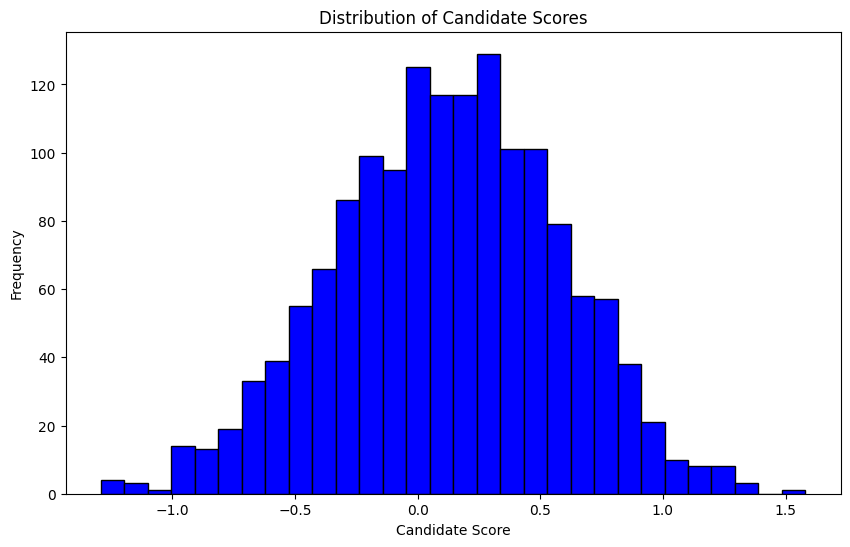

In [22]:
import matplotlib.pyplot as plt

# Plot a histogram of the CandidateScores
plt.figure(figsize=(10, 6))
plt.hist(df['CandidateScore'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Candidate Scores')
plt.xlabel('Candidate Score')
plt.ylabel('Frequency')
plt.show()


# Hiring Decisions

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have a 'HiringDecision' column where 1 = hired and 0 = not hired
y_true = df['HiringDecision']
y_pred = (df['CandidateScore'] > df['CandidateScore'].median()).astype(int)  # Predict hired if candidate score > median

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Confusion Matrix:
[[601 434]
 [149 316]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.58      0.67      1035
           1       0.42      0.68      0.52       465

    accuracy                           0.61      1500
   macro avg       0.61      0.63      0.60      1500
weighted avg       0.68      0.61      0.63      1500



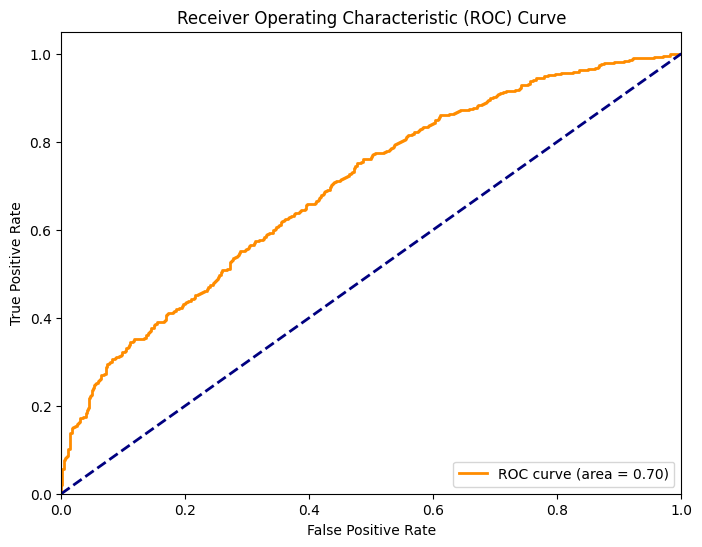

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# candidate scores are continuous, you can calculate the ROC-AUC score
roc_auc = roc_auc_score(y_true, df['CandidateScore'])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, df['CandidateScore'])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Example: Cross-validation for a logistic regression model predicting hiring decision based on features
model = LogisticRegression()

# Evaluate the model using cross-validation
cv_scores = cross_val_score(model, df[['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel']], y_true, cv=5)

# Print the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.74666667 0.76333333 0.75666667 0.71666667 0.66666667]
Mean cross-validation score: 0.73


In [26]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision', 'CandidateScore'],
      dtype='object')

# Working on model

In [27]:
features = ['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel']
target = 'CandidateScore'

# Split the dataset into features (X) and target (y)
X = df[features]
y = df[target]

In [28]:
X

,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel
0,-1.658237,0.916174,-0.089598,1.418126,0.103129,1
1,0.928044,0.575386,-0.543879,1.043255,0.034438,3
2,-1.011667,0.541307,-1.068049,-1.240051,-1.064632,1
3,-0.580620,-0.821844,-0.508934,0.702463,-1.339399,1
4,-0.365097,0.030126,-0.963215,1.213651,1.202199,0
...,...,...,...,...,...,...
1495,-1.011667,-1.639734,0.539406,1.043255,-1.133324,1
1496,0.496997,1.563671,-0.264321,-1.444526,-0.721173,1
1497,-1.442714,1.359198,-0.683657,0.293513,-1.476783,0
1498,-0.796144,-0.481056,-1.452440,-0.183596,0.721356,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape[0],X_test.shape[0]

(1200, 300)

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print the first 5 predictions
print(f"First 5 predicted Candidate Scores: {y_pred[:5]}")


First 5 predicted Candidate Scores: [ 0.8523017   0.58265102  0.44386792 -0.48384432 -0.49855843]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.08851402495904416
Mean Squared Error: 0.012494918865854195
R-squared: 0.9376598912058551


In [32]:
# Add the predicted scores to the test set
df_test = X_test.copy()
df_test['PredictedCandidateScore'] = y_pred

# Rank the candidates by their predicted score
df_test_sorted = df_test.sort_values(by='PredictedCandidateScore', ascending=False)

# Display the top 10 candidates based on predicted scores
df_test_sorted.head(10)


,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,PredictedCandidateScore
1088,1.359091,0.677622,1.413022,1.043255,-0.583789,3,1.023752
1345,0.712520,0.813938,1.308188,0.600226,1.408274,2,0.958200
570,1.359091,0.166441,1.063576,0.872859,0.377897,1,0.936793
1163,0.928044,-0.140268,1.622690,1.009176,0.858740,1,0.863682
1066,1.359091,0.950253,1.587746,-1.103734,0.240513,1,0.863665
1116,1.574614,1.120646,0.574351,-0.251754,0.309205,1,0.852302
968,0.712520,0.302756,1.273244,0.804701,-1.202016,3,0.850912
479,0.928044,1.461434,1.238299,-0.831101,0.515280,1,0.833199
30,0.281474,1.631828,0.993686,-0.047279,0.721356,0,0.827394
453,1.574614,1.086568,1.168410,-0.865180,-0.927248,1,0.807881


# Predict the candidate scores for the entire dataset

In [33]:
y_all_pred = model.predict(X)

# Add the predicted scores to the dataframe
df['PredictedCandidateScore'] = y_all_pred

# Sort the candidates by the predicted score
df_sorted = df.sort_values(by='PredictedCandidateScore', ascending=False)

# Display the top 10 recommended candidates
df_sorted[['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel', 'PredictedCandidateScore']].head(10)

,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,PredictedCandidateScore
189,1.574614,1.665907,1.692580,-0.217675,1.683042,2,1.434380
757,1.574614,0.336835,1.133465,0.532067,1.339582,3,1.250391
1012,1.574614,0.541307,1.168410,0.941018,0.515280,3,1.247022
830,1.359091,0.950253,1.378078,1.384047,1.683042,1,1.234933
863,1.359091,1.631828,1.028631,1.520364,0.652664,1,1.229359
889,1.574614,0.848016,1.727524,1.622601,0.721356,0,1.229007
1183,1.359091,1.427355,1.203354,0.293513,1.339582,1,1.193899
1014,0.928044,1.256962,1.727524,0.225354,0.309205,2,1.178941
154,1.359091,0.336835,1.378078,0.123117,0.790048,3,1.177944
1157,0.928044,0.370913,1.517856,1.520364,0.652664,3,1.157427


# Neural Network training

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim

In [35]:
# features and target
features = ['ExperienceYears', 'SkillScore', 'InterviewScore', 'PersonalityScore', 'DistanceFromCompany', 'EducationLevel']
target = 'CandidateScore'

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Define the target variable
y = df[target].values

# Convert the data into PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape to (n_samples, 1)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

X_train.shape[0],X_test.shape[0]

(1200, 300)

# Candidate Score Model

In [37]:
class CandidateScoreModel(nn.Module):
    def __init__(self):
        super(CandidateScoreModel, self).__init__()
        self.fc1 = nn.Linear(in_features=X_train.shape[1], out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=128)
        self.fc3 = nn.Linear(in_features=128, out_features=64)
        self.fc4 = nn.Linear(in_features=64, out_features=1)

        # Define activation function (ReLU for hidden layers)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Forward pass
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = CandidateScoreModel()

In [38]:
model

CandidateScoreModel(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [39]:
# loss function (Mean Squared Error) & optimizer
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [40]:
epochs = 100

for epoch in range(epochs):
    model.train()
    
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    optimizer.zero_grad()
    
    # Backward pass: Compute gradients
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.1278
Epoch [20/100], Loss: 0.0145
Epoch [30/100], Loss: 0.0086
Epoch [40/100], Loss: 0.0038
Epoch [50/100], Loss: 0.0025
Epoch [60/100], Loss: 0.0015
Epoch [70/100], Loss: 0.0011
Epoch [80/100], Loss: 0.0009
Epoch [90/100], Loss: 0.0007
Epoch [100/100], Loss: 0.0006


In [41]:
model.eval()

with torch.no_grad():
    y_test_pred = model(X_test)

# Compute the loss on the test set
test_loss = loss_function(y_test_pred, y_test)

# Print the test loss
print(f"Test Loss (MSE): {test_loss.item():.4f}")

Test Loss (MSE): 0.0007


#Make predictions for the test set

In [42]:
with torch.no_grad():
    y_pred = model(X_test)

# Convert predictions to a numpy array
y_pred_np = y_pred.numpy()

# Display the first 5 predicted candidate scores
print("First 5 Predicted Candidate Scores:")
print(y_pred_np[:5])

First 5 Predicted Candidate Scores:
[[ 0.8978187 ]
 [ 0.65617627]
 [ 0.6419028 ]
 [-0.5674127 ]
 [-0.57272047]]


In [43]:
## Convert test data and predicted scores into a pandas DataFrame

In [44]:
df_test = pd.DataFrame(X_test.numpy(), columns=features)
df_test['PredictedCandidateScore'] = y_pred_np

# Sort candidates by predicted scores in descending order
df_test_sorted = df_test.sort_values(by='PredictedCandidateScore', ascending=False)

# top 10 recommended candidates
print("Top 10 Recommended Candidates:")
df_test_sorted.head(15)

Top 10 Recommended Candidates:


,ExperienceYears,SkillScore,InterviewScore,PersonalityScore,DistanceFromCompany,EducationLevel,PredictedCandidateScore
119,1.359091,0.677622,1.413023,1.043255,-0.583789,2.101694,1.212695
236,0.712520,0.813937,1.308188,0.600226,1.408274,0.941819,1.098496
94,1.359091,0.950253,1.587746,-1.103734,0.240513,-0.218057,1.015628
160,1.359091,-0.719607,1.657635,0.736542,-1.064632,2.101694,0.980317
95,0.928044,1.461434,1.238299,-0.831101,0.515280,-0.218057,0.968104
265,0.928044,-0.140268,1.622690,1.009176,0.858740,-0.218057,0.947148
0,1.574614,1.120646,0.574351,-0.251754,0.309205,-0.218057,0.897819
225,1.574614,1.086568,1.168410,-0.865180,-0.927248,-0.218057,0.887366
200,0.712520,0.302756,1.273244,0.804701,-1.202016,2.101694,0.885865
252,1.359091,1.052489,0.749074,0.123117,-1.339399,0.941819,0.881497


# Below is preprocessing of above dataset

# Previous data visualisation

In [45]:
df['InterviewScore'].value_counts().sort_index(ascending=False).head(20)

InterviewScore
1.727524    12
1.692580    15
1.657635    12
1.622690    13
1.587746    13
1.552801    10
1.517856    11
1.482912    15
1.447967    13
1.413022    16
1.378078    12
1.343133    14
1.308188    15
1.273244    19
1.238299     9
1.203354    18
1.168410    13
1.133465    13
1.098520    18
1.063576    18
Name: count, dtype: int64

In [46]:
df['RecruitmentStrategy'].value_counts()

RecruitmentStrategy
1    770
0    445
2    285
Name: count, dtype: int64

In [47]:
df['HiringDecision'].value_counts()  #Imbalance Class label

HiringDecision
0    1035
1     465
Name: count, dtype: int64

In [48]:
df['Gender'].value_counts()

Gender
0    762
1    738
Name: count, dtype: int64

In [49]:
df['Age'].value_counts()

Age
45    64
20    64
49    63
47    62
24    60
22    57
36    54
34    53
38    51
27    50
42    50
44    50
41    49
48    48
31    47
32    47
43    47
21    46
23    46
40    46
50    46
25    45
39    44
35    43
26    43
28    40
46    39
29    39
33    37
30    35
37    35
Name: count, dtype: int64

In [50]:
age_counts=df['Age'].value_counts().sort_index(ascending=True)

<Axes: xlabel='Age'>

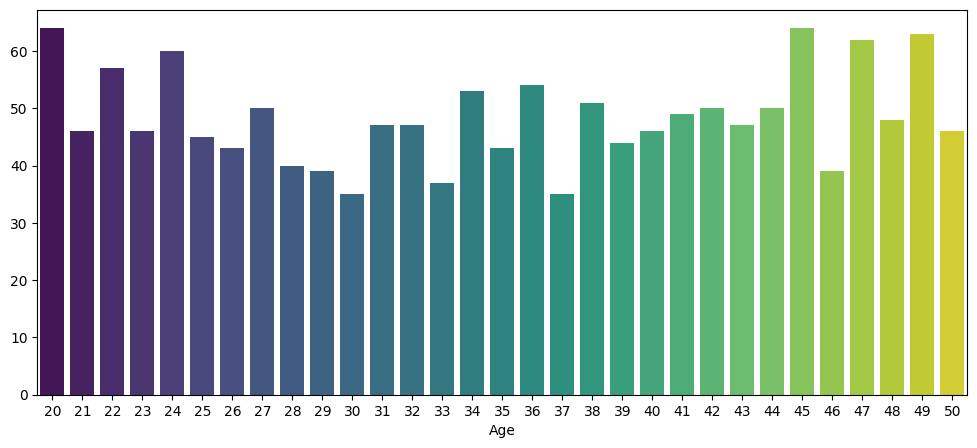

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='viridis')

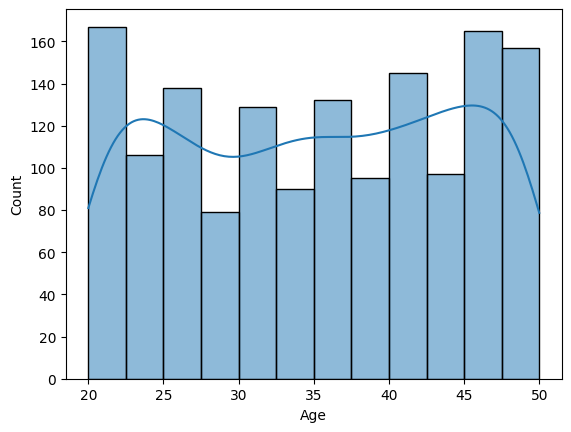

In [52]:
sns.histplot(df['Age'], kde=True)
plt.show()

In [53]:
avg_age_hired = df.groupby('HiringDecision')['Age'].mean()
avg_age_hired

HiringDecision
0    35.137198
1    35.174194
Name: Age, dtype: float64

In [54]:
RS_hired = df.groupby('RecruitmentStrategy')['HiringDecision'].mean()*100
RS_hired

RecruitmentStrategy
0    71.685393
1    13.636364
2    14.385965
Name: HiringDecision, dtype: float64

<Axes: xlabel='RecruitmentStrategy'>

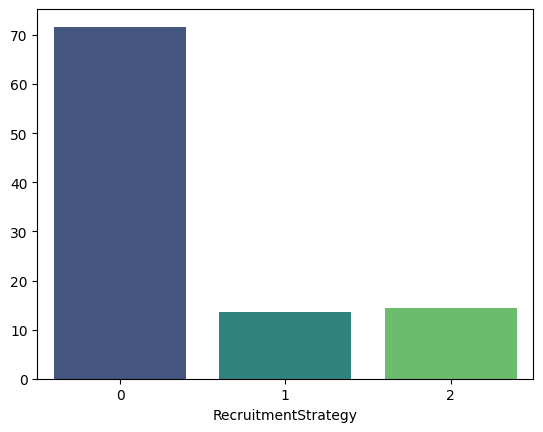

In [55]:
sns.barplot(x=RS_hired.index, y=RS_hired.values, palette='viridis')

In [56]:
df['RecruitmentStrategy'].value_counts()

RecruitmentStrategy
1    770
0    445
2    285
Name: count, dtype: int64

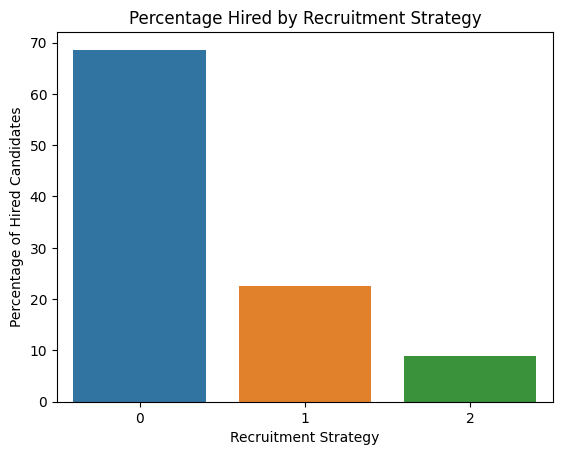

In [57]:
hired_df = df[df['HiringDecision'] == 1]
strategy_percentages = hired_df.groupby('RecruitmentStrategy')['HiringDecision'].count() / len(hired_df) * 100
# Create a bar plot
sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage Hired by Recruitment Strategy')
plt.show()

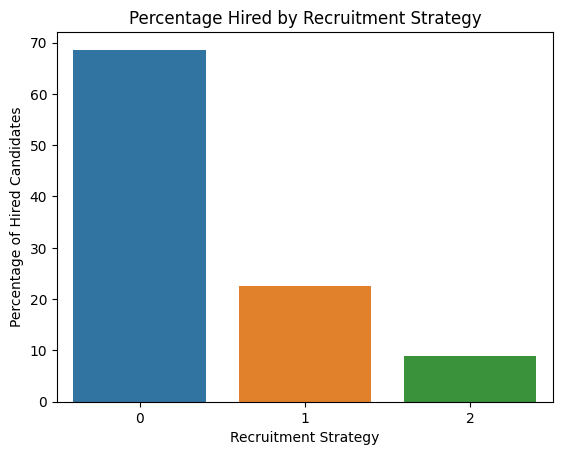

In [58]:
hired_df = df[df['HiringDecision'] != 1]
strategy_percentages1 = hired_df.groupby('RecruitmentStrategy')['HiringDecision'].count() / len(hired_df) * 100
# Create a bar plot
sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage Hired by Recruitment Strategy')
plt.show()

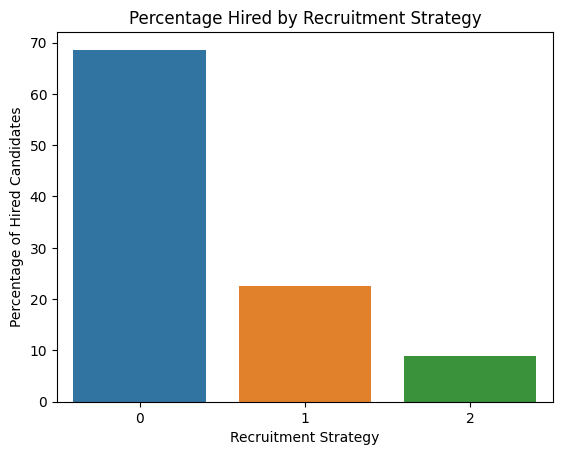

In [59]:
strategy_percentages1 = df.groupby('RecruitmentStrategy')['HiringDecision'].count() / len(df) * 100
# Create a bar plot
sns.barplot(x=strategy_percentages.index, y=strategy_percentages.values)
plt.xlabel('Recruitment Strategy')
plt.ylabel('Percentage of Hired Candidates')
plt.title('Percentage Hired by Recruitment Strategy')
plt.show()

In [60]:
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,CandidateScore,PredictedCandidateScore
0,26,1,1,-1.658237,3,0.103129,-0.089598,0.916174,1.418126,0,1,-0.006078,0.030089
1,39,1,3,0.928044,3,0.034438,-0.543879,0.575386,1.043255,1,1,0.591694,0.532049
2,48,0,1,-1.011667,2,-1.064632,-1.068049,0.541307,-1.240051,1,0,-0.595538,-0.592520
3,34,1,1,-0.580620,2,-1.339399,-0.508934,-0.821844,0.702463,2,0,-0.425898,-0.423174
4,30,0,0,-0.365097,1,1.202199,-0.963215,0.030126,1.213651,1,0,-0.132628,-0.142515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,1,-1.011667,4,-1.133324,0.539406,-1.639734,1.043255,2,1,-0.328049,-0.283200
1496,27,1,1,0.496997,3,-0.721173,-0.264321,1.563671,-1.444526,1,0,0.241117,0.256648
1497,24,1,0,-1.442714,2,-1.476783,-0.683657,1.359198,0.293513,0,1,-0.412263,-0.400567
1498,48,0,1,-0.796144,4,0.721356,-1.452440,-0.481056,-0.183596,1,1,-0.577203,-0.554488


In [61]:
df['Gender'].value_counts()


Gender
0    762
1    738
Name: count, dtype: int64

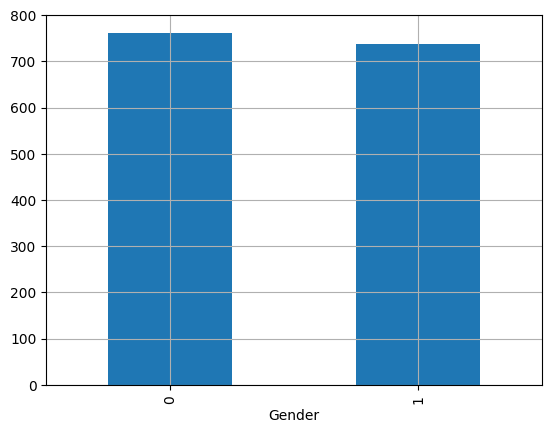

In [62]:
df['Gender'].value_counts().plot(kind='bar')
plt.grid()
plt.show()

<Axes: xlabel='EducationLevel'>

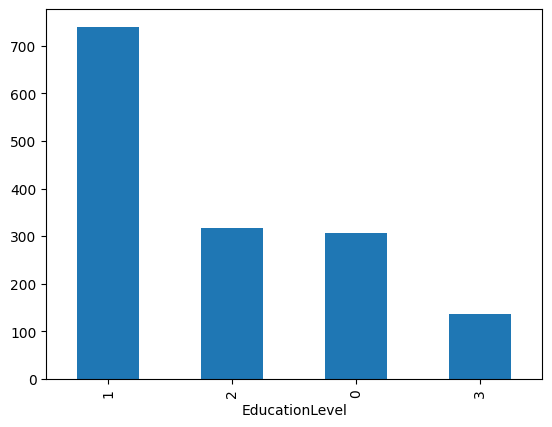

In [63]:
df['EducationLevel'].value_counts().plot(kind='bar')

<Axes: xlabel='ExperienceYears'>

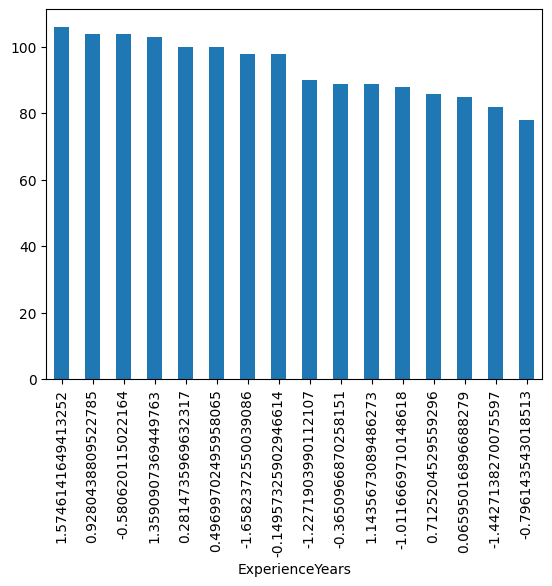

In [64]:
df['ExperienceYears'].value_counts().plot(kind='bar')

<Axes: xlabel='PreviousCompanies'>

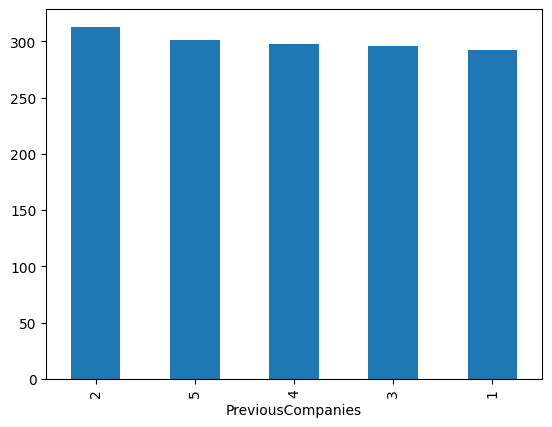

In [65]:
df['PreviousCompanies'].value_counts().plot(kind='bar')

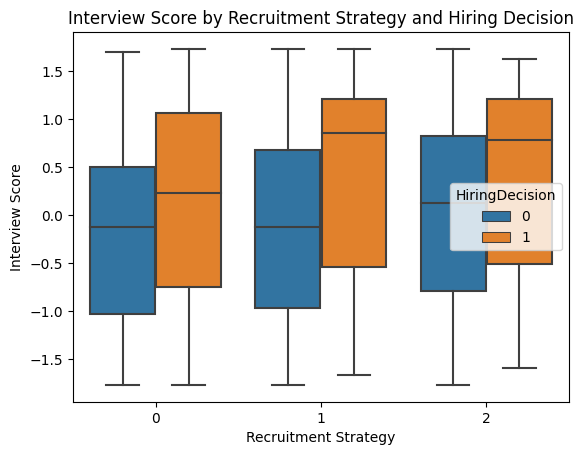

In [66]:
# influence the correlation between interview score and hiring decision?
sns.boxplot(x='RecruitmentStrategy', y='InterviewScore', hue='HiringDecision', data=df)
plt.title('Interview Score by Recruitment Strategy and Hiring Decision')
plt.xlabel('Recruitment Strategy')
plt.ylabel('Interview Score')
plt.show()

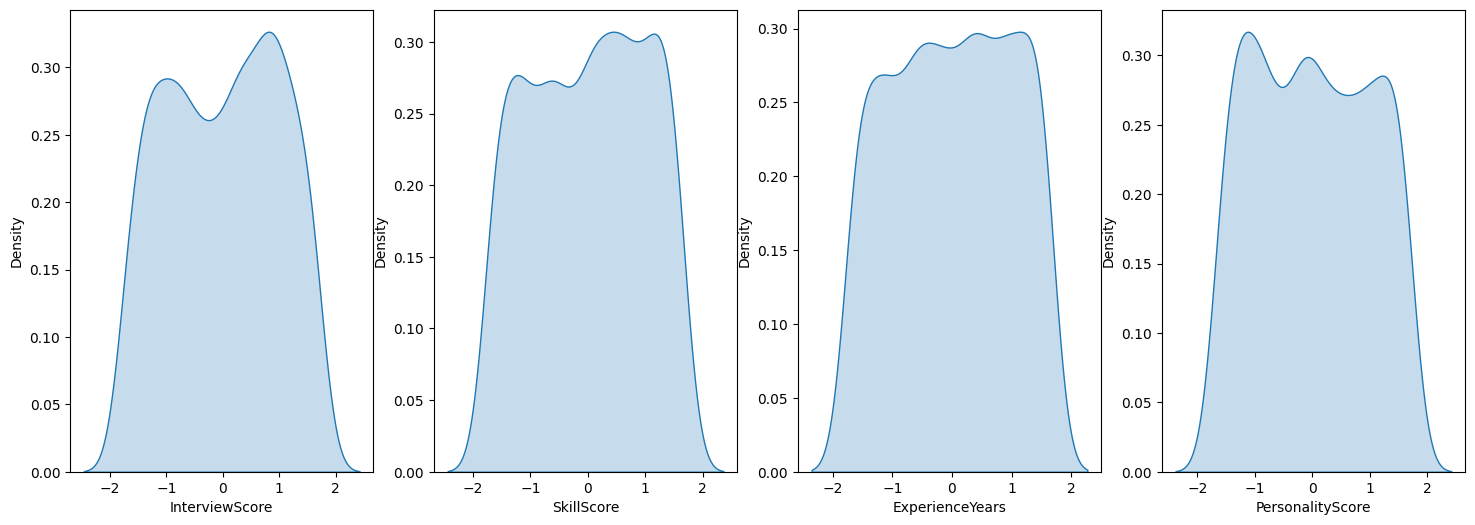

In [67]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

sns.kdeplot(df['InterviewScore'], fill=True, label='Interview Score', ax=axes[0])
sns.kdeplot(df['SkillScore'], fill=True, label='Skill Score', ax=axes[1])
sns.kdeplot(df['ExperienceYears'], fill=True, label='Experience Years', ax=axes[2])
sns.kdeplot(df['PersonalityScore'], fill=True, label='Personality Score', ax=axes[3])
plt.show()

# Working on Model Training

In [68]:
df.head(50)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,CandidateScore,PredictedCandidateScore
0,26,1,1,-1.658237,3,0.103129,-0.089598,0.916174,1.418126,0,1,-0.006078,0.030089
1,39,1,3,0.928044,3,0.034438,-0.543879,0.575386,1.043255,1,1,0.591694,0.532049
2,48,0,1,-1.011667,2,-1.064632,-1.068049,0.541307,-1.240051,1,0,-0.595538,-0.592520
3,34,1,1,-0.580620,2,-1.339399,-0.508934,-0.821844,0.702463,2,0,-0.425898,-0.423174
4,30,0,0,-0.365097,1,1.202199,-0.963215,0.030126,1.213651,1,0,-0.132628,-0.142515
5,27,0,2,1.359091,4,0.446589,0.120070,-0.038032,0.020879,0,1,0.614934,0.585106
6,48,0,1,-0.365097,1,-0.583789,-0.928270,0.030126,0.497988,2,0,-0.272310,-0.275854
7,40,0,3,1.143567,3,-0.995940,-1.557274,-1.639734,1.452205,2,0,-0.163611,-0.182503
8,26,1,2,-0.365097,5,0.240513,1.028631,0.916174,0.054958,0,1,0.630097,0.602977
9,45,1,1,-1.227190,5,0.309205,1.447967,-1.196710,1.520364,2,0,0.171207,0.166342


In [69]:
X=df.drop('HiringDecision', axis=1)
y=df['HiringDecision']

In [70]:
X.head(25)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,CandidateScore,PredictedCandidateScore
0,26,1,1,-1.658237,3,0.103129,-0.089598,0.916174,1.418126,0,-0.006078,0.030089
1,39,1,3,0.928044,3,0.034438,-0.543879,0.575386,1.043255,1,0.591694,0.532049
2,48,0,1,-1.011667,2,-1.064632,-1.068049,0.541307,-1.240051,1,-0.595538,-0.592520
3,34,1,1,-0.580620,2,-1.339399,-0.508934,-0.821844,0.702463,2,-0.425898,-0.423174
4,30,0,0,-0.365097,1,1.202199,-0.963215,0.030126,1.213651,1,-0.132628,-0.142515
5,27,0,2,1.359091,4,0.446589,0.120070,-0.038032,0.020879,0,0.614934,0.585106
6,48,0,1,-0.365097,1,-0.583789,-0.928270,0.030126,0.497988,2,-0.272310,-0.275854
7,40,0,3,1.143567,3,-0.995940,-1.557274,-1.639734,1.452205,2,-0.163611,-0.182503
8,26,1,2,-0.365097,5,0.240513,1.028631,0.916174,0.054958,0,0.630097,0.602977
9,45,1,1,-1.227190,5,0.309205,1.447967,-1.196710,1.520364,2,0.171207,0.166342


In [71]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1495    1
1496    0
1497    1
1498    1
1499    1
Name: HiringDecision, Length: 1500, dtype: int64

In [72]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [73]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1200, 1200, 300, 300)

# For Imbalance data

In [74]:
class_counts = np.bincount(y_train)
min_samples = np.min(class_counts)
max_samples = np.max(class_counts)
imbalance_ratio = min_samples / max_samples
imbalance_ratio

0.4634146341463415

In [75]:
# Check for class imbalance
class_counts = np.bincount(y_train)
min_samples = np.min(class_counts)
max_samples = np.max(class_counts)
imbalance_ratio = min_samples / max_samples
if imbalance_ratio < 0.5:
    print(f"Class imbalance detected. Imbalance ratio: {imbalance_ratio:.2f}")
    if imbalance_ratio < 0.1:
        print("Severe imbalance. Applying SMOTE...")
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)
    else:
        print("Moderate imbalance. Consider adjusting class weights in models.")

Class imbalance detected. Imbalance ratio: 0.46
Moderate imbalance. Consider adjusting class weights in models.


In [76]:
# Initialize the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
models = {'LogisticRegression': LogisticRegression(max_iter=100, C=1.0, solver='lbfgs', class_weight='balanced'),
          'SVC': SVC(C=1.0, kernel='rbf', probability=True, class_weight='balanced'),
          'DecisionTree': DecisionTreeClassifier(max_depth=20, min_samples_split=2, class_weight='balanced'),
          'RandomForest': RandomForestClassifier(n_estimators=700, max_depth=20, class_weight='balanced'),
          'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
          'CatBoost': CatBoostClassifier(verbose=0, iterations=100)
         }

In [78]:
model_performance = {}

In [79]:
for model_name, model in models.items():
    print("Classification with", model_name)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the performance in the dictionary
    model_performance[model_name] = accuracy

    # Print accuracy with 3 decimal places
    print(f"Accuracy: {accuracy * 100 :.2f}\n")

Classification with LogisticRegression
Accuracy: 80.67

Classification with SVC
Accuracy: 88.00

Classification with DecisionTree
Accuracy: 85.00

Classification with RandomForest
Accuracy: 92.67

Classification with XGBoost
Accuracy: 93.00

Classification with CatBoost
Accuracy: 94.33



# Working on best model

In [80]:
# Train the model with the best hyperparameters
model = CatBoostClassifier(verbose=0,
                           iterations=100,
                           random_state=42,
                          )

In [81]:
model.fit(X_train, y_train)

In [82]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred)*100)

Accuracy on test set: 95.33333333333334


In [83]:
print("Classification Report:------------------------------")
print(classification_report(y_test, y_pred))

Classification Report:------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       215
           1       0.93      0.91      0.92        85

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [84]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[209   6]
 [  8  77]]


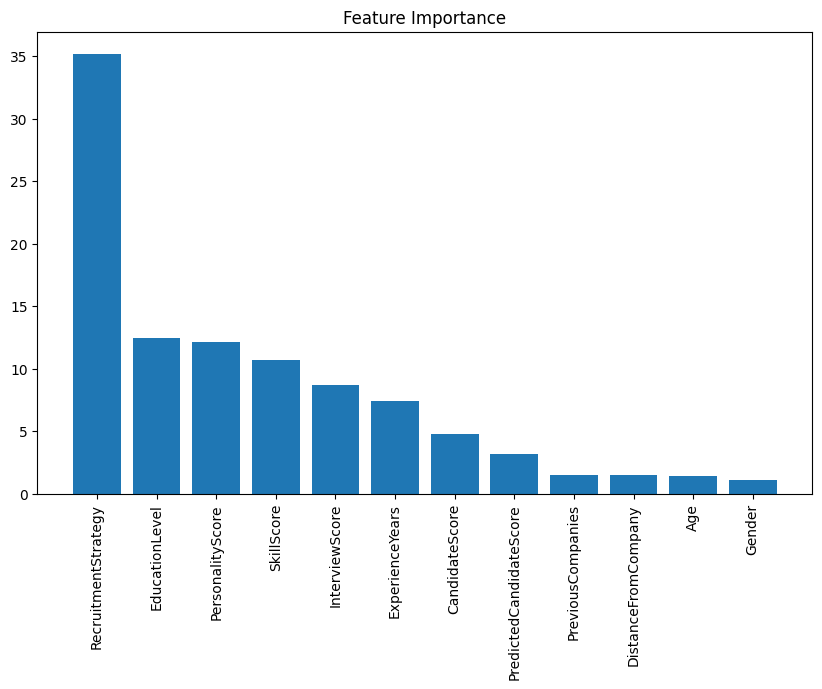

In [85]:
# Plotting feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Displaying samples with predicted and actual values

In [86]:
samples = pd.DataFrame(X_test, columns=features)
samples

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,CandidateScore,PredictedCandidateScore
0,0.862877,-0.983470,-0.224484,1.561639,1.428179,0.306525,0.556652,1.129698,-0.268028,0.142986,1.674592,1.658107
1,1.622723,1.016808,-0.224484,0.276046,1.428179,1.412575,0.766084,-0.228180,1.264697,1.584862,1.088644,1.043602
2,-1.416660,-0.983470,0.931657,-0.152486,1.428179,-1.214292,1.219852,1.197592,-0.540513,0.142986,1.030289,0.727330
3,-1.308111,-0.983470,-1.380625,-0.366751,-0.697263,-0.592140,-1.502759,-0.533703,1.298757,0.142986,-1.518413,-1.386828
4,1.405624,1.016808,-0.224484,-1.652345,0.011218,-1.490805,-0.560317,-0.533703,1.605302,1.584862,-1.515940,-1.420359
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.862877,-0.983470,-0.224484,-1.438079,0.011218,0.237397,-0.281075,-1.348430,0.447243,0.142986,-1.450709,-1.403992
296,1.188525,-0.983470,2.087797,-1.223814,-0.697263,-0.868652,-1.048991,-0.228180,-0.540513,1.584862,-1.365061,-1.221195
297,-0.765364,-0.983470,-0.224484,0.061780,0.011218,1.758215,-0.769749,1.095751,-1.494208,0.142986,0.022035,-0.346764
298,1.079976,-0.983470,-0.224484,-0.152486,1.428179,-1.283420,-1.467854,-1.552111,0.208820,0.142986,-1.991630,-1.898540


In [87]:
samples['Actual'] = y_test.values
samples['Predicted'] = y_pred

In [88]:
samples.head(10)

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,CandidateScore,PredictedCandidateScore,Actual,Predicted
0,0.862877,-0.983470,-0.224484,1.561639,1.428179,0.306525,0.556652,1.129698,-0.268028,0.142986,1.674592,1.658107,0,0
1,1.622723,1.016808,-0.224484,0.276046,1.428179,1.412575,0.766084,-0.228180,1.264697,1.584862,1.088644,1.043602,0,0
2,-1.416660,-0.983470,0.931657,-0.152486,1.428179,-1.214292,1.219852,1.197592,-0.540513,0.142986,1.030289,0.727330,1,1
3,-1.308111,-0.983470,-1.380625,-0.366751,-0.697263,-0.592140,-1.502759,-0.533703,1.298757,0.142986,-1.518413,-1.386828,0,0
4,1.405624,1.016808,-0.224484,-1.652345,0.011218,-1.490805,-0.560317,-0.533703,1.605302,1.584862,-1.515940,-1.420359,0,0
5,1.622723,1.016808,-1.380625,0.061780,1.428179,-0.523012,0.417031,0.348918,-1.255784,0.142986,-0.187229,0.335871,0,0
6,-1.199561,1.016808,-0.224484,-1.652345,0.011218,1.066934,1.534000,1.469168,-1.460148,0.142986,0.609712,0.866244,0,0
7,-0.656814,1.016808,-0.224484,-1.438079,0.011218,-0.937780,-0.665033,-1.552111,0.855970,0.142986,-1.954856,-2.164875,0,0
8,0.862877,1.016808,-1.380625,1.561639,0.719699,-1.490805,-0.490506,0.213130,-1.051421,0.142986,-0.183724,0.319723,0,0
9,-0.439715,-0.983470,-0.224484,-0.795283,0.719699,0.652166,-1.188612,-1.110801,-0.881118,-1.298890,-1.787199,-1.723791,0,0
